# 🩺 Health Insurance Fraud Detection with Microsoft Copilot

## 🧩 Problem Identification

A health insurance provider suspects that fraudulent claims are inflating operational costs.  
The goal of this project is to integrate **Microsoft Copilot** into the company’s data workflow to help **detect anomalies in claims data** and **flag potential fraud automatically**.

---

## 🎯 Objectives

- Simulate a realistic dataset of health insurance claims.  
- Assess data quality and structure.  
- Explore data to uncover suspicious patterns.  
- Implement anomaly detection models.  
- Demonstrate how Copilot can accelerate each stage of the analytical workflow.

---

## 🔄 Workflow

### 1. Generate Synthetic Dataset

Create a dataset that mimics real-world health insurance data:  
- Features may include: `claim_id`, `patient_id`, `provider_id`, `claim_amount`, `diagnosis_code`, `date_of_service`, `reimbursement_amount`, `is_fraud`.  
- Include realistic relationships and noise to simulate genuine claim behaviors.  
- Introduce a small proportion of fraudulent samples (e.g., 3–5%) to reflect real-world imbalance.

**Copilot Integration:**  
Prompt Copilot to generate realistic synthetic data using statistical distributions or data synthesis libraries such as **Faker**, **SDV**, or **scikit-learn.datasets.make_classification()**.

---

### 2. Data Profiling

- Summarize dataset shape, data types, and missing values.  
- Calculate descriptive statistics (mean, median, min, max, skewness).  
- Identify categorical vs numerical features.

**Copilot Integration:**  
Ask Copilot to write Python functions or **Pandas Profiling / YData Profiling** code to automate data summaries and generate profiling reports.

---

### 3. Data Quality Assessment

- Check for missing, inconsistent, or duplicate records.  
- Validate logical consistency (e.g., negative claim amounts, invalid dates).  
- Standardize formats for IDs and codes.

**Copilot Integration:**  
Use Copilot to suggest and generate cleaning functions, validation checks, and repair logic.

---

### 4. Exploratory Data Analysis (EDA)

- Visualize claim amount distributions and correlations.  
- Identify high-risk providers or unusual claim frequencies.  
- Explore seasonal patterns and provider-level statistics.

**Copilot Integration:**  
Ask Copilot to create visualization scripts using **matplotlib**, **seaborn**, or **plotly**, and automatically generate dashboards for deeper insights.

---

### 5. Feature Engineering

Derive new predictive variables, such as:  
- `claim_to_avg_ratio` (claim amount relative to provider average)  
- `claims_per_patient` (claim frequency)  
- `days_since_last_claim`  
- `provider_fraud_rate` (historical indicator)  

Apply scaling or encoding techniques as required.

**Copilot Integration:**  
Use Copilot to propose engineered features and write transformation pipelines (e.g., **ColumnTransformer** or **FeatureUnion**).

---

### 6. Anomaly Detection Implementation

Apply unsupervised anomaly detection algorithms:  
- **Isolation Forest**  
- **One-Class SVM**  
- **Autoencoder (Neural Network)**  

Compare model results using **precision**, **recall**, and **F1-score**.  
Visualize detected anomalies and rank them by risk level.

**Copilot Integration:**  
Let Copilot assist in implementing, tuning, and evaluating anomaly detection models.  
Ask it to explain the reasoning behind flagged anomalies using **SHAP** or feature importance.

---

### 7. Model Evaluation and Explainability

- Evaluate performance metrics: precision, recall, ROC-AUC, confusion matrix.  
- Generate explainability visualizations using **SHAP** or **LIME**.  
- Document results and insights in a reproducible report.

**Copilot Integration:**  
Prompt Copilot to create summary notebooks or Markdown reports with visual explanations and metric tables.

---

## 💡 Expected Outcome

By integrating **Microsoft Copilot** throughout the workflow, the company can:

✅ Automate data quality and profiling checks.  
⚡ Accelerate EDA and feature engineering.  
🧠 Build interpretable anomaly detection models faster.  
🔍 Proactively flag suspicious claims to reduce financial losses.


In [ ]:
import numpy as np
import pandas as pd
import faker
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data generator
fake = faker.Faker()

# Generate synthetic dataset
n_samples = 10000
n_providers = 100
n_patients = 1000

def generate_synthetic_claims():
    data = {
        'claim_id': range(1, n_samples + 1),
        'patient_id': [f'P{fake.random_int(min=1, max=n_patients)}' for _ in range(n_samples)],
        'provider_id': [f'DR{fake.random_int(min=1, max=n_providers)}' for _ in range(n_samples)],
        'claim_amount': np.random.lognormal(mean=5.5, sigma=1, size=n_samples),
        'diagnosis_code': [f'ICD{fake.random_int(min=100, max=999)}' for _ in range(n_samples)],
        'date_of_service': [(datetime.now() - timedelta(days=fake.random_int(min=1, max=365))).strftime('%Y-%m-%d') for _ in range(n_samples)],
    }
    
    # Add fraudulent patterns (5% of claims)
    fraud_idx = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
    data['is_fraud'] = np.zeros(n_samples)
    data['is_fraud'][fraud_idx] = 1
    
    # Inflate claim amounts for fraudulent cases
    data['claim_amount'][fraud_idx] *= np.random.uniform(2, 5, size=len(fraud_idx))
    
    return pd.DataFrame(data)

# Generate the dataset
df = generate_synthetic_claims()

# Display first few rows and basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())
print("\nData Info:")
display(df.info())

Dataset Shape: (10000, 7)

First few rows:


,claim_id,patient_id,provider_id,claim_amount,diagnosis_code,date_of_service,is_fraud
0,1,P804,DR100,402.105364,ICD993,2025-06-10,0.0
1,2,P266,DR67,213.094494,ICD310,2025-06-04,0.0
2,3,P700,DR57,1798.742610,ICD449,2025-08-09,1.0
3,4,P137,DR81,1122.181521,ICD276,2025-05-29,0.0
4,5,P481,DR82,193.610155,ICD527,2025-09-04,0.0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   claim_id         10000 non-null  int64  
 1   patient_id       10000 non-null  object 
 2   provider_id      10000 non-null  object 
 3   claim_amount     10000 non-null  float64
 4   diagnosis_code   10000 non-null  object 
 5   date_of_service  10000 non-null  object 
 6   is_fraud         10000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 547.0+ KB


None

In [ ]:
# Data Profiling
def profile_dataset(df):
    profile = {
        'missing_values': df.isnull().sum(),
        'duplicates': df.duplicated().sum(),
        'numeric_stats': df.describe(),
        'categorical_counts': {col: df[col].value_counts() for col in df.select_dtypes(include=['object']).columns}
    }
    return profile

# Data Quality Checks
def check_data_quality(df):
    issues = []
    
    # Check for negative claim amounts
    if (df['claim_amount'] < 0).any():
        issues.append("Found negative claim amounts")
    
    # Check for future dates
    if pd.to_datetime(df['date_of_service']).max() > datetime.now():
        issues.append("Found future dates")
    
    # Check for duplicate claim IDs
    if df['claim_id'].duplicated().any():
        issues.append("Found duplicate claim IDs")
    
    return issues

# Run profiling and quality checks
profile = profile_dataset(df)
quality_issues = check_data_quality(df)

print("Data Profile Summary:")
print("\nMissing Values:")
display(profile['missing_values'])
print("\nNumeric Statistics:")
display(profile['numeric_stats'])
print("\nData Quality Issues:")
display(quality_issues)

Data Profile Summary:

Missing Values:


claim_id           0
patient_id         0
provider_id        0
claim_amount       0
diagnosis_code     0
date_of_service    0
is_fraud           0
dtype: int64


Numeric Statistics:


,claim_id,claim_amount,is_fraud
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,458.035059,0.050000
std,2886.89568,835.260250,0.217956
min,1.00000,4.843317,0.000000
25%,2500.75000,129.345554,0.000000
50%,5000.50000,255.928015,0.000000
75%,7500.25000,510.146332,0.000000
max,10000.00000,48336.835729,1.000000



Data Quality Issues:


[]

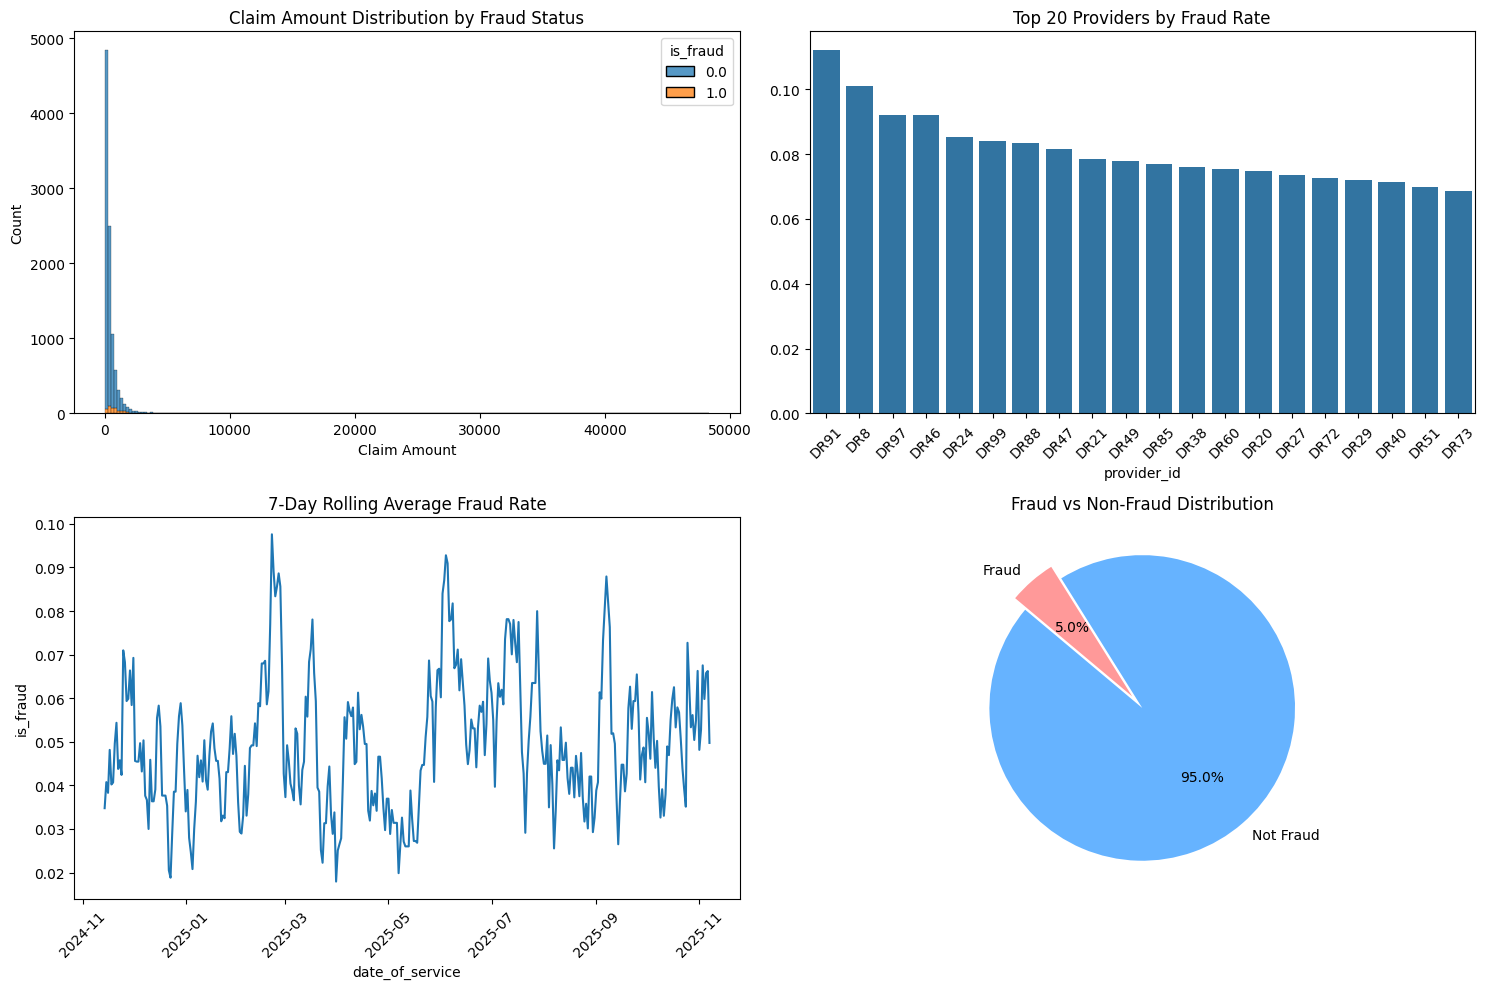

In [ ]:
# Create EDA visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Claim Amount Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='claim_amount', hue='is_fraud', multiple="stack")
plt.title('Claim Amount Distribution by Fraud Status')
plt.xlabel('Claim Amount')

# Plot 2: Claims per Provider
plt.subplot(2, 2, 2)
provider_claims = df.groupby('provider_id')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=provider_claims.head(20).index, y=provider_claims.head(20).values)
plt.title('Top 20 Providers by Fraud Rate')
plt.xticks(rotation=45)

# Plot 3: Temporal Pattern
plt.subplot(2, 2, 3)
df['date_of_service'] = pd.to_datetime(df['date_of_service'])
claims_over_time = df.groupby('date_of_service')['is_fraud'].mean().rolling(7).mean()
sns.lineplot(data=claims_over_time)
plt.title('7-Day Rolling Average Fraud Rate')
plt.xticks(rotation=45)

# Plot 4: Fraud Distribution Pie Chart
plt.subplot(2, 2, 4)
fraud_counts = df['is_fraud'].value_counts()
labels = ['Not Fraud', 'Fraud']
colors = ['#66b3ff', '#ff9999']
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Fraud vs Non-Fraud Distribution')

plt.tight_layout()
plt.show()


## Why SMOTE for Fraud Detection?

SMOTE (Synthetic Minority Over-sampling Technique) is chosen for this fraud detection case because:

1. **Intelligent Synthetic Samples**: Unlike simple random oversampling, SMOTE creates synthetic examples by interpolating between existing minority class samples, preserving the statistical properties of the fraud cases.

2. **Avoid Overfitting**: Random oversampling can lead to overfitting since it creates exact copies of minority samples. SMOTE reduces this risk by generating similar but not identical samples.

3. **Feature Space Coverage**: SMOTE helps better represent the minority class in the feature space by creating samples along the line segments joining k-nearest neighbors.

4. **Preserve Relationships**: For fraud detection, it's crucial to maintain the relationships between features. SMOTE preserves these correlations better than other techniques.

Original class distribution:
Counter({0.0: 9500, 1.0: 500})

Resampled class distribution:
Counter({0.0: 9500, 1.0: 9500})


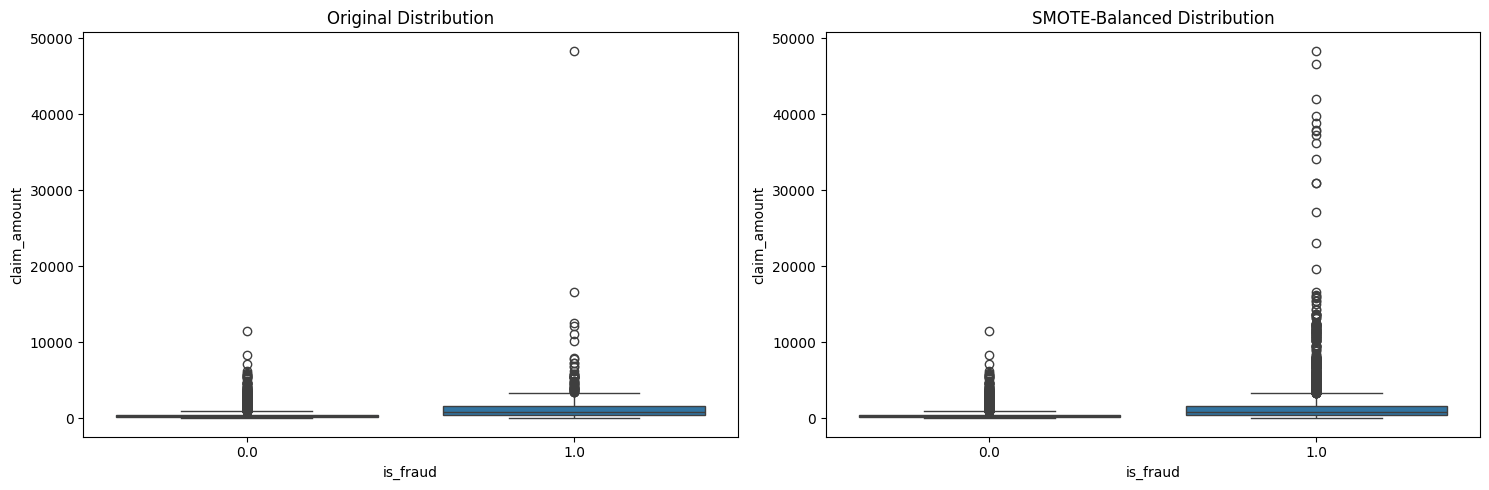


Original Data Statistics:
           count         mean          std        min         25%         50%  \
is_fraud                                                                        
0.0       9500.0   403.170453   524.170382   4.843317  124.908743  243.839814   
1.0        500.0  1500.462580  2757.420881  27.996920  394.301418  831.586630   

                  75%           max  
is_fraud                             
0.0        478.467502  11530.275310  
1.0       1591.495246  48336.835729  

SMOTE-Balanced Data Statistics:
           count         mean          std        min         25%         50%  \
is_fraud                                                                        
0.0       9500.0   403.170453   524.170382   4.843317  124.908743  243.839814   
1.0       9500.0  1419.346947  2181.803825  27.996920  380.441769  803.207351   

                  75%           max  
is_fraud                             
0.0        478.467502  11530.275310  
1.0       1579.685705  4

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for SMOTE
# Select numeric features for oversampling
numeric_features = ['claim_amount']
X = df[numeric_features]
y = df['is_fraud']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create new balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=numeric_features)
df_balanced['is_fraud'] = y_resampled

# Compare class distributions
print("Original class distribution:")
print(Counter(y))
print("\nResampled class distribution:")
print(Counter(y_resampled))

# Visualize the distributions before and after SMOTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original distribution
sns.boxplot(data=df, x='is_fraud', y='claim_amount', ax=ax1)
ax1.set_title('Original Distribution')

# SMOTE-balanced distribution
sns.boxplot(data=df_balanced, x='is_fraud', y='claim_amount', ax=ax2)
ax2.set_title('SMOTE-Balanced Distribution')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\nOriginal Data Statistics:")
print(df.groupby('is_fraud')['claim_amount'].describe())
print("\nSMOTE-Balanced Data Statistics:")
print(df_balanced.groupby('is_fraud')['claim_amount'].describe())

# KS test to compare distributions
from scipy import stats
fraud_original = df[df['is_fraud'] == 1]['claim_amount']
fraud_synthetic = df_balanced[df_balanced['is_fraud'] == 1]['claim_amount']

ks_statistic, p_value = stats.ks_2samp(fraud_original, fraud_synthetic)
print("\nKolmogorov-Smirnov test results:")
print(f"KS statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Original class distribution:
Counter({0.0: 9500, 1.0: 500})

Resampled class distribution:
Counter({0.0: 9500, 1.0: 9500})


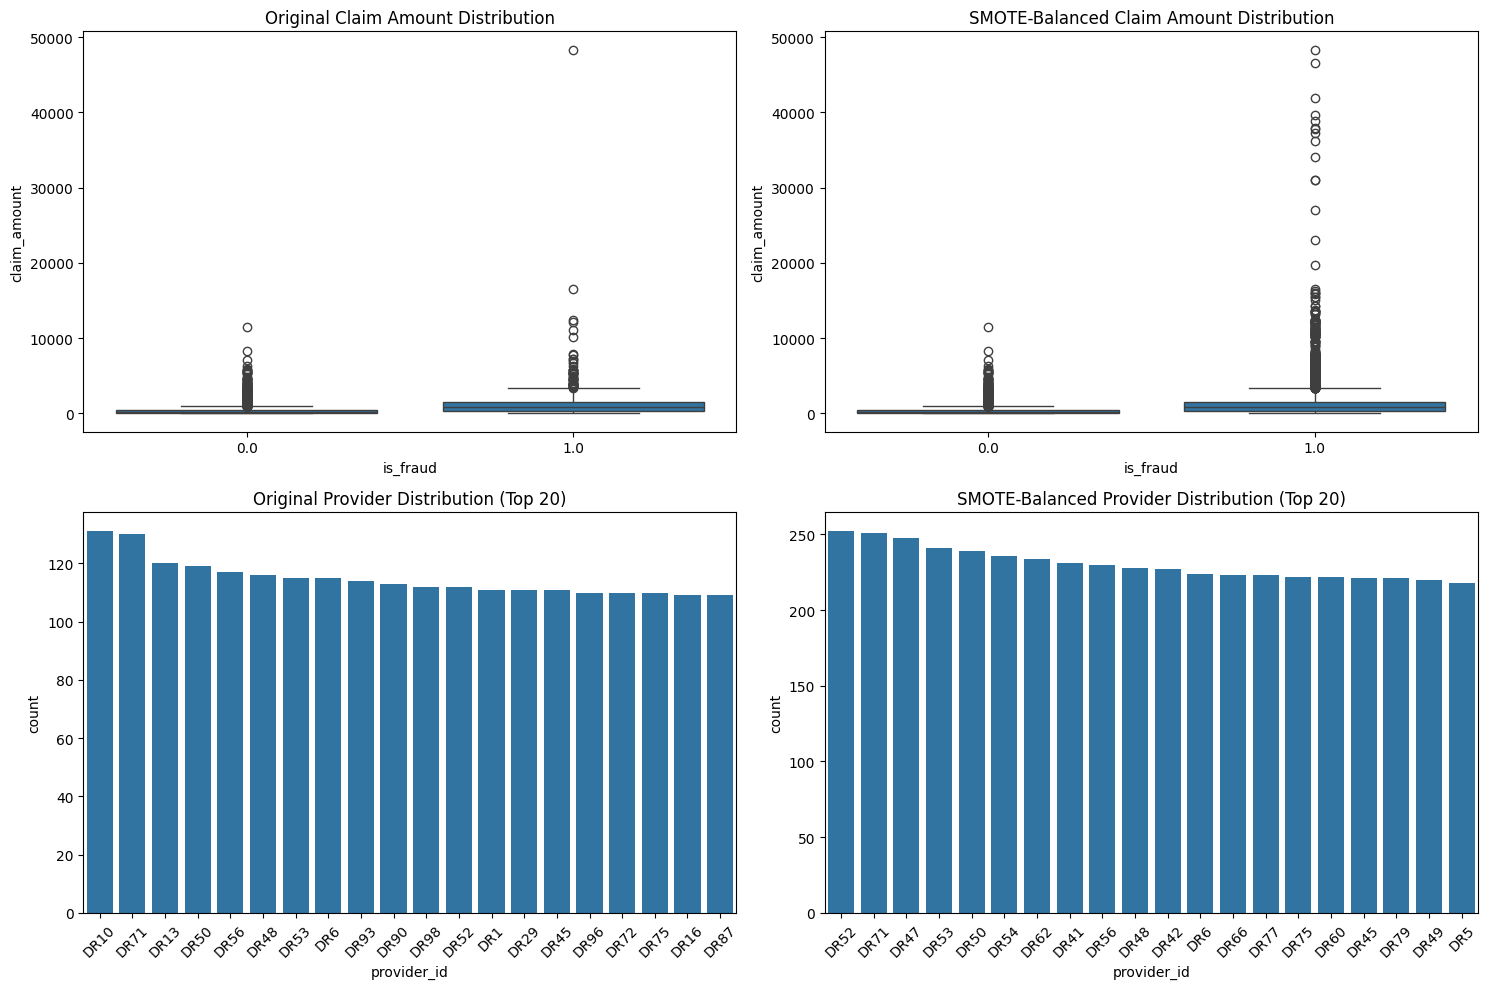


Original vs SMOTE-balanced statistics for claim_amount:

Original Data Statistics:
           count         mean          std        min         25%         50%  \
is_fraud                                                                        
0.0       9500.0   403.170453   524.170382   4.843317  124.908743  243.839814   
1.0        500.0  1500.462580  2757.420881  27.996920  394.301418  831.586630   

                  75%           max  
is_fraud                             
0.0        478.467502  11530.275310  
1.0       1591.495246  48336.835729  

SMOTE-Balanced Data Statistics:
           count         mean          std        min         25%         50%  \
is_fraud                                                                        
0.0       9500.0   403.170453   524.170382   4.843317  124.908743  243.839814   
1.0       9500.0  1418.621584  2180.489844  27.996920  377.403038  804.661748   

                  75%           max  
is_fraud                             
0.0  

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data for SMOTE
def prepare_data_for_smote(df):
    # Create a copy of the dataframe
    df_prep = df.copy()
    
    # Convert date to numerical (days since minimum date)
    df_prep['date_of_service'] = pd.to_datetime(df_prep['date_of_service'])
    min_date = df_prep['date_of_service'].min()
    df_prep['date_of_service'] = (df_prep['date_of_service'] - min_date).dt.days
    
    # Initialize label encoders for categorical variables
    encoders = {}
    categorical_columns = ['patient_id', 'provider_id', 'diagnosis_code']
    
    # Encode categorical variables
    for column in categorical_columns:
        encoders[column] = LabelEncoder()
        df_prep[column] = encoders[column].fit_transform(df_prep[column])
    
    return df_prep, encoders

# 2. Apply SMOTE
def apply_smote(df_prep):
    # Separate features and target
    X = df_prep.drop(['is_fraud', 'claim_id'], axis=1)  # exclude claim_id as it's just an identifier
    y = df_prep['is_fraud']
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

# 3. Convert back to original format
def restore_original_format(X_resampled, y_resampled, encoders, original_df):
    # Create new dataframe with resampled data
    df_resampled = pd.DataFrame(X_resampled, columns=X_resampled.columns)
    df_resampled['is_fraud'] = y_resampled
    
    # Decode categorical variables
    for column, encoder in encoders.items():
        df_resampled[column] = encoder.inverse_transform(df_resampled[column].astype(int))
    
    # Convert days back to dates
    min_date = pd.to_datetime(original_df['date_of_service']).min()
    df_resampled['date_of_service'] = pd.to_datetime(min_date + pd.to_timedelta(df_resampled['date_of_service'], unit='D'))
    
    # Generate new claim_ids for synthetic samples
    max_claim_id = original_df['claim_id'].max()
    new_claim_ids = range(max_claim_id + 1, max_claim_id + 1 + len(df_resampled))
    df_resampled['claim_id'] = new_claim_ids
    
    return df_resampled

# Execute the process
# 1. Prepare data
df_prep, encoders = prepare_data_for_smote(df)

# 2. Apply SMOTE
X_resampled, y_resampled = apply_smote(df_prep)

# 3. Restore format
df_balanced = restore_original_format(X_resampled, y_resampled, encoders, df)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Class distribution comparison
print("Original class distribution:")
print(Counter(df['is_fraud']))
print("\nResampled class distribution:")
print(Counter(df_balanced['is_fraud']))

# Plot claim amount distributions
sns.boxplot(data=df, x='is_fraud', y='claim_amount', ax=axes[0,0])
axes[0,0].set_title('Original Claim Amount Distribution')

sns.boxplot(data=df_balanced, x='is_fraud', y='claim_amount', ax=axes[0,1])
axes[0,1].set_title('SMOTE-Balanced Claim Amount Distribution')

# Plot provider distribution
sns.countplot(data=df, x='provider_id', ax=axes[1,0], order=df['provider_id'].value_counts().iloc[:20].index)
axes[1,0].set_title('Original Provider Distribution (Top 20)')
axes[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_balanced, x='provider_id', ax=axes[1,1], order=df_balanced['provider_id'].value_counts().iloc[:20].index)
axes[1,1].set_title('SMOTE-Balanced Provider Distribution (Top 20)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical validation
print("\nOriginal vs SMOTE-balanced statistics for claim_amount:")
print("\nOriginal Data Statistics:")
print(df.groupby('is_fraud')['claim_amount'].describe())
print("\nSMOTE-Balanced Data Statistics:")
print(df_balanced.groupby('is_fraud')['claim_amount'].describe())


In [ ]:
# Feature Engineering
def engineer_features(df):
    # Calculate claim-to-average ratio
    provider_avg = df_balanced.groupby('provider_id')['claim_amount'].transform('mean')
    df_balanced['claim_to_avg_ratio'] = df_balanced['claim_amount'] / provider_avg
    
    # Calculate claims per patient
    df_balanced['claims_per_patient'] = df_balanced.groupby('patient_id')['claim_id'].transform('count')
    
    # Calculate days since last claim
    df_balanced['days_since_last_claim'] = df_balanced.groupby('patient_id')['date_of_service'].transform(
        lambda x: (x - x.shift()).dt.days
    )
    
    return df

# Engineer features
df_engineered = engineer_features(df_balanced)

# Prepare features for anomaly detection
feature_columns = ['claim_amount', 'claim_to_avg_ratio', 'claims_per_patient']
X = df_engineered[feature_columns]
X = StandardScaler().fit_transform(X)

# Train anomaly detection models
models = {
    'Isolation Forest': IsolationForest(contamination=0.05, random_state=42),
    'One-Class SVM': OneClassSVM(nu=0.05)
}

# Evaluate models
results = {}
for name, model in models.items():
    # Fit and predict
    predictions = model.fit_predict(X)
    # Convert predictions to binary (1 for inliers, 0 for outliers

In [ ]:
df_engineered

,patient_id,provider_id,claim_amount,diagnosis_code,date_of_service,is_fraud,claim_id,claim_to_avg_ratio,claims_per_patient,days_since_last_claim
0,P804,DR100,402.105364,ICD993,2025-06-10,0.0,10001,0.507899,30,NaN
1,P266,DR67,213.094494,ICD310,2025-06-04,0.0,10002,0.287166,25,NaN
2,P700,DR57,1798.742610,ICD449,2025-08-09,1.0,10003,2.279547,25,NaN
3,P137,DR81,1122.181521,ICD276,2025-05-29,0.0,10004,1.440283,17,NaN
4,P481,DR82,193.610155,ICD527,2025-09-04,0.0,10005,0.280829,19,NaN
...,...,...,...,...,...,...,...,...,...,...
18995,P778,DR10,659.141032,ICD160,2025-09-14,1.0,28996,0.814945,28,113.0
18996,P25,DR86,3384.217517,ICD149,2025-07-02,1.0,28997,4.551962,18,158.0
18997,P688,DR40,1792.516655,ICD941,2025-02-16,1.0,28998,1.429941,33,-23.0
18998,P773,DR83,1863.435292,ICD828,2025-08-05,1.0,28999,2.673646,27,153.0



Training Random Forest...

Training XGBoost...

Training LightGBM...
[LightGBM] [Info] Number of positive: 7600, number of negative: 7600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 15200, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 7600, number of negative: 7600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 15200, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

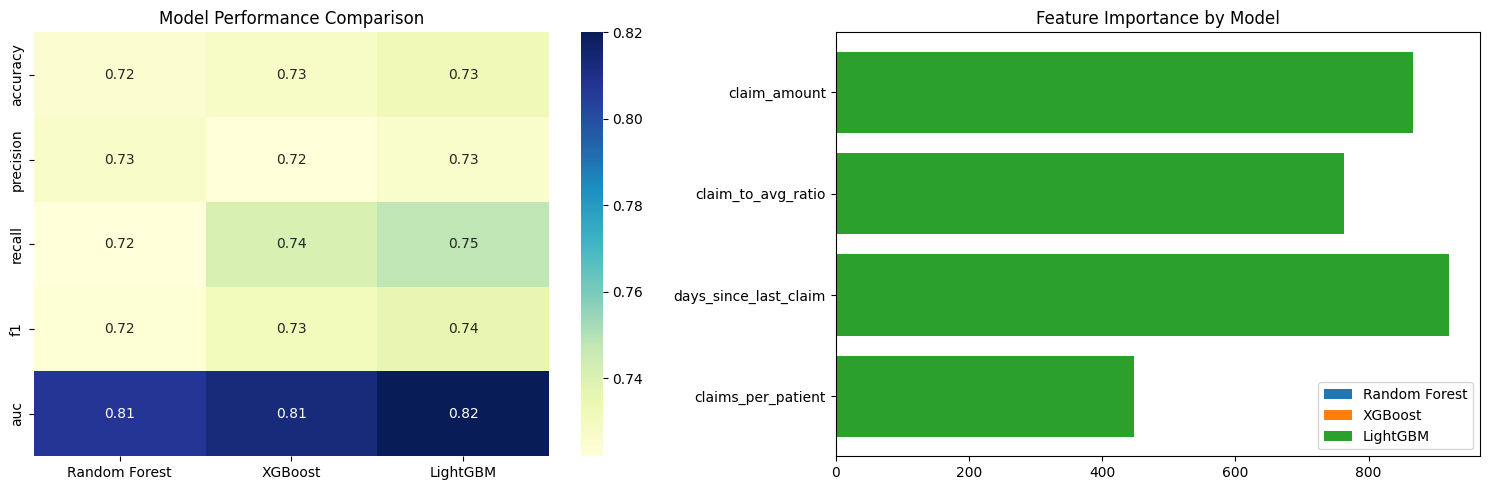


Detailed Model Performance:

Random Forest Results:
accuracy: 0.725 ± 0.006
precision: 0.727 ± 0.007
recall: 0.722 ± 0.008
f1: 0.724 ± 0.006
auc: 0.807 ± 0.006

XGBoost Results:
accuracy: 0.728 ± 0.006
precision: 0.722 ± 0.007
recall: 0.741 ± 0.008
f1: 0.731 ± 0.005
auc: 0.813 ± 0.006

LightGBM Results:
accuracy: 0.732 ± 0.009
precision: 0.726 ± 0.012
recall: 0.748 ± 0.009
f1: 0.736 ± 0.008
auc: 0.820 ± 0.008

Best performing model: LightGBM


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
def prepare_features(df):
    # Select features for modeling
    feature_cols = ['claim_amount', 'claim_to_avg_ratio', 'claims_per_patient', 'days_since_last_claim']
    X = df[feature_cols].fillna(0)  # Handle any NaN values
    y = df['is_fraud']
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)
    
    return X_scaled, y, feature_cols

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X, y, feature_cols = prepare_features(df_engineered)

# Store results
cv_results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []} 
              for name in models.keys()}
feature_importance = {name: pd.DataFrame() for name in models.keys()}

# Perform cross-validation
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        # Calculate metrics
        cv_results[name]['accuracy'].append(accuracy_score(y_val, y_pred))
        cv_results[name]['precision'].append(precision_score(y_val, y_pred))
        cv_results[name]['recall'].append(recall_score(y_val, y_pred))
        cv_results[name]['f1'].append(f1_score(y_val, y_pred))
        cv_results[name]['auc'].append(roc_auc_score(y_val, y_pred_proba))
        
        # Store feature importance
        if hasattr(model, 'feature_importances_'):
            importance = pd.DataFrame({
                'feature': feature_cols,
                f'importance_fold_{fold}': model.feature_importances_
            })
            feature_importance[name] = pd.concat([feature_importance[name], importance], axis=1)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Model Performance Comparison
metrics_df = pd.DataFrame({
    name: {
        metric: np.mean(scores) for metric, scores in model_scores.items()
    } for name, model_scores in cv_results.items()
}).round(3)

sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', ax=ax1)
ax1.set_title('Model Performance Comparison')

# Plot 2: Feature Importance Comparison
for name, importance in feature_importance.items():
    if not importance.empty:
        importance_means = importance.filter(like='importance').mean(axis=1)
        importance_df = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': importance_means
        }).sort_values('Importance', ascending=True)
        
        ax2.barh(y=importance_df['Feature'], width=importance_df['Importance'], label=name)

ax2.set_title('Feature Importance by Model')
ax2.legend()

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Model Performance:")
for name in models.keys():
    print(f"\n{name} Results:")
    for metric, scores in cv_results[name].items():
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        print(f"{metric}: {mean_score:.3f} ± {std_score:.3f}")

# Best model selection
best_model = max(cv_results.items(), 
                key=lambda x: np.mean(x[1]['auc']))[0]

print(f"\nBest performing model: {best_model}")